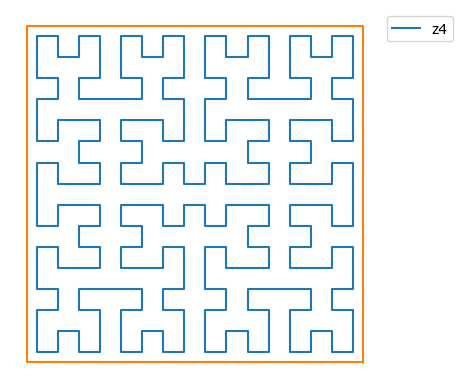

(1.984375, 32.0, 0.7947617129655653, 127.0, 98.0)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
def show_plot():
  ax=plt.gca()
  ax.set_aspect('equal')
  ax.set_axis_off()
  plt.show()
  plt.close()
def  hilbert(n):
  a=1+1j
  b=np.conj(a)
  z=np.array([0])
  for k in range(n):
    w=1j*np.conj(z)
    z=np.concatenate([w-a,z-b,z+a,b-w])/2.0
  return z
def moore(n):
  z=-np.conj(hilbert(n))
  w=np.concatenate([z+1+1j,z-1+1j])
  return np.concatenate([w,-1.0*w])/2.0
def area_length(x):
  deltax=np.roll(x,-1)-x
  area=sum(np.conj(x)*deltax).imag/2.0#the cross product
  length=sum(abs(deltax))
  return (area,length)
z4=moore(3)
plt.plot((*z4.real,z4[0].real),(*z4.imag,z4[0].imag),label='z4')
a4,l4=area_length(z4)
r4=(a4/np.pi)**0.5
l=(a4*2)**0.5/2
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
show_plot()
a4,l4,r4,a4/0.125**2,15**2-a4/0.125**2

In [2]:
n=8
zu=np.concatenate([[z4[i-1]*(n-k)+z4[i]*k for k in range(1,n+1)] for i in range(len(z4))])/n
zu=np.roll(zu,-n//2+1)
zuf=np.fft.fft(zu)
rcos=(0.5*(1+np.cos(np.pi*2*np.array(list(range(len(zu))))/len(zu))))
rzu=r4*len(zu)
zuf[1]-=rzu
zuff=zuf*rcos**np.exp(2)
zuff[1]+=rzu
zk=np.fft.ifft(zuff)

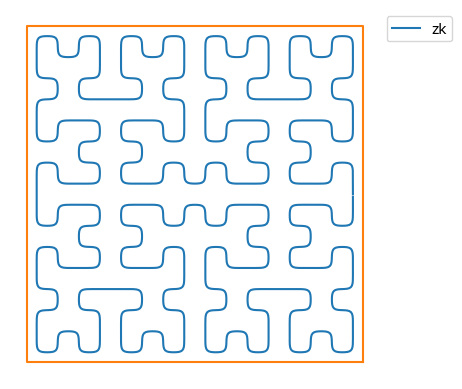

(1.9826331841017, 28.182769506973752)


In [3]:
plt.plot(zk.real,zk.imag,label='zk')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
show_plot()
print(area_length(zk))

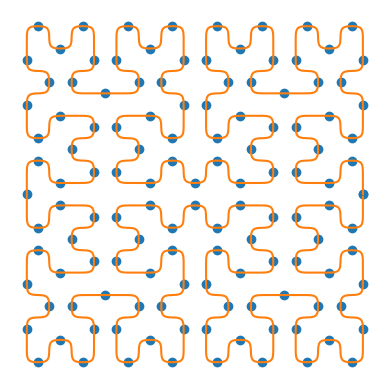

In [4]:
def ifft(fft,t):
  n=len(fft)
  n_2=n//2
  omega=np.roll(np.arange(-n_2,n_2),n_2).reshape((-1,1))
  return np.sum(fft.reshape((-1,1))*np.exp(1.0j*2*np.pi*omega*t),axis=0)/n
x=ifft(zuff,np.linspace(0.0,1.0,128+1))
plt.plot(x.real,x.imag,'o')
plt.plot(zk.real,zk.imag)
show_plot()

In [5]:
ifft(zuff,0.25)

array([-2.61925931e-16+0.06280858j])